<a href="https://colab.research.google.com/github/Noel1805/Inteligencia_Artificial/blob/main/Dataset_de_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción a la Curva ROC
La Curva ROC (Receiver Operating Characteristic) es una herramienta gráfica utilizada para evaluar el rendimiento de un clasificador binario, como el modelo de regresión logística que hemos entrenado. Muestra la relación entre la Tasa de Verdaderos Positivos (TPR), también conocida como sensibilidad, y la Tasa de Falsos Positivos (FPR), que es (1 - especificidad), para diferentes umbrales de clasificación.

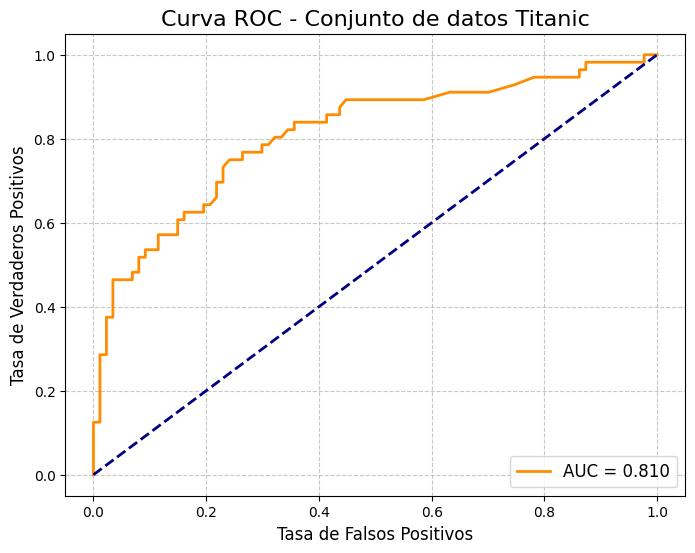

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/titanic-train.csv")

df = df[["Survived","Pclass","Sex","Age"]]
df["Sex"] = df["Sex"].map({"male":0,"female":1})
df = df.dropna()

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", color='darkorange', linewidth=2)
plt.plot([0,1],[0,1],"--", color='navy', linewidth=2)
plt.title("Curva ROC - Conjunto de datos Titanic", fontsize=16)
plt.xlabel("Tasa de Falsos Positivos", fontsize=12)
plt.ylabel("Tasa de Verdaderos Positivos", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



#Análisis de los Resultados
En la gráfica que se muestra, podemos observar la curva ROC generada por nuestro modelo de regresión logística para predecir la supervivencia en el conjunto de datos del Titanic. La línea discontinua diagonal representa un clasificador aleatorio, donde el modelo no tiene capacidad discriminatoria (AUC = 0.5).

Nuestro modelo ha logrado un Área Bajo la Curva (AUC) de 0.810. Este valor indica que hay un 81% de probabilidad de que el modelo clasifique correctamente un pasajero que sobrevivió y uno que no, en comparación con un par elegido al azar. Cuanto más se aleja la curva ROC de la línea diagonal (hacia la esquina superior izquierda), mejor es el rendimiento del modelo.

#Conclusión
El valor AUC de 0.810 sugiere que el modelo de regresión logística tiene una buena capacidad discriminatoria para predecir la supervivencia en el Titanic basándose en las características de 'Pclass', 'Sex' y 'Age'. Un AUC superior a 0.70 generalmente se considera aceptable, y un valor cercano a 0.80 o más indica un buen rendimiento. Por lo tanto, podemos concluir que el modelo es bastante efectivo para distinguir entre los pasajeros que sobrevivieron y los que no.

